In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('query_domain/train.csv')
test_df = pd.read_csv('query_domain/test.csv')
pd.set_option('display.max_colwidth', None)

In [3]:
df

,ID,Title,Domain
0,1,"What is good in a decision tree, a large or a small leaf size?",Techniques
1,2,Training data only contains single positive label,Techniques
2,3,Calculating percentage contribution of a negative component,Techniques
3,4,Unable to open solution checker!,Hackathons
4,5,User Name Change,Misc
...,...,...,...
3840,3841,Where to find practice problems for linear regression?,Resources
3841,3842,Running Java code on the GPU with Aparapi,Tools
3842,3843,R/Python Script needed to assign Cluster ID to each PO records based on multiple conditions across columns,Tools
3843,3844,Separate a column into two column,Techniques


In [4]:
df.shape

(3845, 3)

In [5]:
df.head()

,ID,Title,Domain
0,1,"What is good in a decision tree, a large or a small leaf size?",Techniques
1,2,Training data only contains single positive label,Techniques
2,3,Calculating percentage contribution of a negative component,Techniques
3,4,Unable to open solution checker!,Hackathons
4,5,User Name Change,Misc


In [6]:
df.isnull().sum()

ID         0
Title     11
Domain     0
dtype: int64

In [7]:
df.dropna(axis = 'index', how = 'any', inplace = True) 
#dropna() has by default axis set to 'index' and how set to 'any'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3834 entries, 0 to 3844
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3834 non-null   int64 
 1   Title   3834 non-null   object
 2   Domain  3834 non-null   object
dtypes: int64(1), object(2)
memory usage: 119.8+ KB


In [9]:
#check wether null values are removed or not by applying filter
filt = df['Title'].isnull()

In [10]:
df[filt]

,ID,Title,Domain


In [11]:
print(df['Domain'].unique())
df['Domain'].value_counts()

['Techniques' 'Hackathons' 'Misc' 'Tools' 'Career' 'Resources' 'Other']


Domain
Techniques    1852
Tools          917
Career         437
Hackathons     262
Resources      170
Other          122
Misc            74
Name: count, dtype: int64

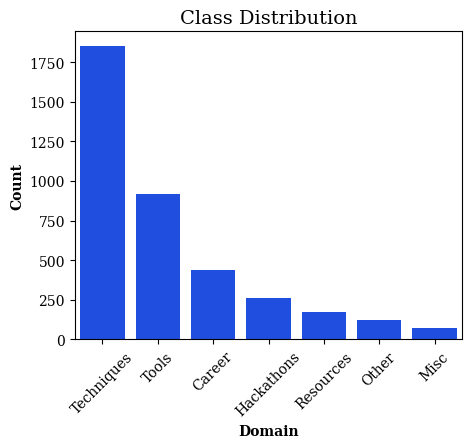

In [44]:
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Domain', order=df['Domain'].value_counts().index)
plt.title('Class Distribution', fontsize = 14)
plt.xlabel('Domain', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

In [13]:
def clean(text):
    return ''.join([c.lower() for c in text if c.isalnum() or c.isspace()])

In [14]:
df['clean_title'] = (df['Title'].apply(clean))

In [15]:
df['clean_title']

0                                                    what is good in a decision tree a large or a small leaf size
1                                                               training data only contains single positive label
2                                                     calculating percentage contribution of a negative component
3                                                                                 unable to open solution checker
4                                                                                                user name change
                                                          ...                                                    
3840                                                        where to find practice problems for linear regression
3841                                                                    running java code on the gpu with aparapi
3842    rpython script needed to assign cluster id to each po records based on multiple 

In [16]:
df['label'] = df['Domain'].astype('category').cat.codes

In [17]:
df['label']

0       5
1       5
2       5
3       1
4       2
       ..
3840    4
3841    6
3842    6
3843    5
3844    5
Name: label, Length: 3834, dtype: int8

In [37]:
label_mapping = dict(enumerate(df['Domain'].astype('category').cat.categories))
mapping_df = pd.DataFrame(list(label_mapping.items()), columns = ['Code', 'Domain'])

In [38]:
mapping_df

,Code,Domain
0,0,Career
1,1,Hackathons
2,2,Misc
3,3,Other
4,4,Resources
5,5,Techniques
6,6,Tools


In [19]:
X = df['clean_title']

In [20]:
y = df['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3067,)
(767,)
(3067,)
(767,)


In [23]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 10000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
model = LogisticRegressionCV(cv = 5, max_iter = 1000)

In [25]:
model.fit(X_train_vec, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

In [26]:
y_pred = model.predict(X_test_vec)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6792698826597132
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76        94
           1       0.63      0.50      0.56        52
           2       1.00      0.06      0.11        18
           3       0.33      0.05      0.08        21
           4       0.53      0.21      0.30        38
           5       0.70      0.84      0.76       369
           6       0.60      0.59      0.60       175

    accuracy                           0.68       767
   macro avg       0.65      0.43      0.45       767
weighted avg       0.67      0.68      0.66       767



In [28]:
X_unseen = test_df['Title']

In [29]:
X_unseen_vec = vectorizer.transform(X_unseen)

In [30]:
y_unseen_pred = model.predict(X_unseen_vec)

In [31]:
predicted_domains = [label_mapping[label] for label in y_unseen_pred]

In [32]:
test_df['Predicted_Label'] = y_unseen_pred
test_df['Predicted_Domain'] = predicted_domains 

In [33]:
test_df.to_csv('submission.csv', index = False)

In [34]:
sub_df = pd.read_csv('submission.csv', index_col = 'ID')

In [35]:
sub_df

,Title,Predicted_Label,Predicted_Domain
ID,,,
3846,Spark Cheatsheet,4,Resources
3847,Review of Random forest code in Python,6,Tools
3848,Chi-Sq Test for Numeric variables,6,Tools
3849,Prediction from loaded pickled file for single instance of input,5,Techniques
3850,"Even after installing Anaconda on my PC, I am unable to access Jupyter Notebook on my command prompt",6,Tools
...,...,...,...
5490,Should we take all the variables from the training data in a randomForest model?,5,Techniques
5491,Time Series Forecasting and reducing it to stationary series,5,Techniques
5492,Data Visualization and text analysis (twitter mining),5,Techniques
